# <font color = Crimson size = 6> <b>Точечные оценки параметров распределения</b> </font>

In [2]:
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

***
## <font color = DarkGreen size = 5> <b>Меры центральной тенденции</b> </font>

***
### <font color = MediumBlue size = 4> <b>Гистограмма частот / Распределение частот</b> </font>

представляет в графической форме число случаев появления каждого значения измеренной характеристики (признака) в каждом выбранном диапазоне ее значений. Рапредление частот позволяет быстро сделать выводы о степени подробности результатов измерений.

In [9]:
X = np.array([185, 175, 170, 169, 171, 175, 157, 170, 172, 172, 172, 172, 167, 173, 168, 167, 166, 167, 169, 177, 178, 165, 
        161, 179, 159, 164, 178, 170, 173, 171])

data = np.unique(X, return_counts=True)

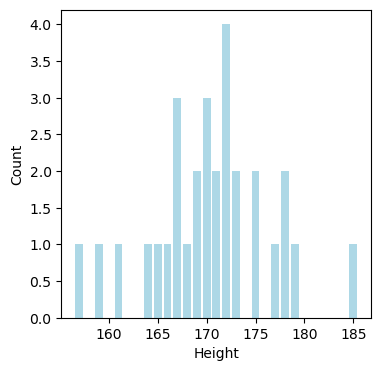

In [23]:
plt.figure(figsize=(4,4))

plt.bar(data[0], data[1], width=0.8, color = 'lightblue')
plt.xlabel('Height')
plt.ylabel('Count');

***
### <font color = MediumBlue size = 4> <b>Мода (mode)</b> </font>

Мода $M_0$ дискретного вариационного ряда – это варианта с максимальной частотой.

Для интервального вариационного ряда нужно найти **модальный интервал**, т.е. с максимальной частотой.

In [18]:
modes = stats.mode(X)[0]
modes

array([172])

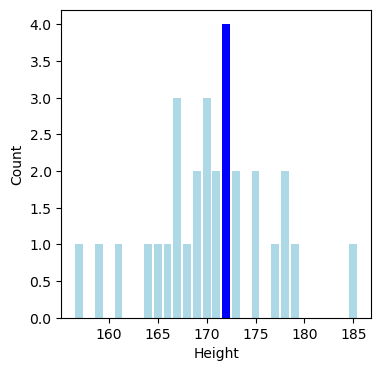

In [24]:
fig, ax = plt.subplots(figsize=(4, 4))

colors = ['blue' if v in modes else 'lightblue' for v in data[0]]
ax.bar(data[0], data[1], width=0.8, color = colors)
ax.set_xlabel('Height')
ax.set_ylabel('Count');

***
### <font color = MediumBlue size = 4> <b>Медиана (median)</b> </font>

Медиана $m_e$ вариационного ряда – это значение, которая делит его на две равные части (по количеству вариант).
>не важно, дискретного или интервального, генеральной совокупности или выборочной.


Для **дискретного** вариационного ряда:

* для нечетной выборки: $\displaystyle m_e = N_{\left[\frac{n+1}{2}\right]}$

* для четной выборки: 
$m_e = \frac{N_{\left[\frac{n}{2}\right]} + 
       N_{\left[\frac{n}{2}+1\right]}}
      {2}$
<br><br>

Для **интервального** вариационного ряда: \
<u>**медианный интервал**</u> – это интервал, содержащий варианту (либо 2 варианты), которая делит вариационный ряд на две равные части. 

$\displaystyle m_e = x_0 + \frac{0.5n-n_{m-1}^{n}}{n_m}h$, где \
$n$ — объём статистической совокупности \
$x_0$ — нижняя граница медианного интервала \
$h$ — длина медианного интервала \
$n_m$ — частота медианного интервала \
$n_{m-1}^{n}$ — накопленная частота предыдущего интервала

In [26]:
me = np.median(X)
me

170.5

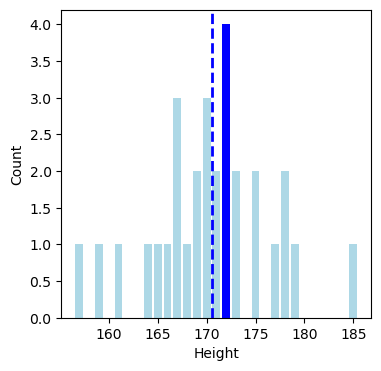

In [28]:
fig, ax = plt.subplots(figsize=(4, 4))

colors = ['blue' if v in modes else 'lightblue' for v in data[0]]
ax.bar(data[0], data[1], width=0.8, color = colors)
plt.axvline(x=me, color='blue', ls='--', lw=2)
ax.set_xlabel('Height')
ax.set_ylabel('Count');

***
### <font color = MediumBlue size = 4> <b>Среднее значение / среднее арифметическое (mean)</b> </font>

Среднее арифметическое – это центр выборки, вокруг которого группируются элементы выборки.

<u>**Генеральная средняя**</u> \
– среднее арифметическое всех значений генеральной совокупности.

$\displaystyle \bar X = \frac{\sum_{i=1}^{N}{x_i}}{N}$

Если рассматривать обследуемый признак $X$ генеральной совокупности как случайную величину, то математическое ожидание
признака равно генеральной средней этого признака: $M(X) = \bar{X}$.

Обобщая полученный результат на генеральную совокупность с непрерывным распределением признака $X$, и в этом случае определим генеральную среднюю как математическое ожидание признака: $\bar{X} = M(X)$
<br><br>


<u>**Выборочная средняя**</u> \
– сумма значений измеренного признака всех элементов выборки, делённая на количество элементов выборки объема $n$.

$\displaystyle \bar x_e = \frac{\sum_{i=1}^{n}{x_i}}{n}$

Выборочная средняя, найденная по данным одной выборки, есть, очевидно, определенное число. Если же извлекать
другие выборки того же объема из той же генеральной совокупности, то выборочная средняя будет изменяться от выборки к выборке. 
Таким образом, выборочную среднюю можно рассматривать как случайную величину, а следовательно, можно говорить о распределениях
(теоретическом и эмпирическом) выборочной средней и о числовых характеристиках этого распределения (его называют выборочным),
в частности о математическом ожидании и дисперсии выборочного распределения.

При увеличении объема выборки $n$ выборочная средняя стремится по вероятности к генеральной средней, а это и означает, что выборочная средняя есть состоятельная оценка генеральной средней. \
Из сказанного следует также, что если по нескольким выборкам достаточно большого объема из одной и той же генеральной совокупности будут найдены выборочные средние, то они будут приближенно равны между собой. \
В этом и состоит свойство **устойчивости выборочных средних**.

Заметим, что если дисперсии двух одинаково распределенных совокупностей равны между собой, то близость выборочных средних к генеральным не зависит от отношения объема выборки к объему генеральной совокупности. Она зависит от объема выборки: чем объем выборки больше, тем меньше выборочная средняя отличается от генеральной.
<br><br>


#### <font color = SteelBlue size = 3> <b>Отклонение от общей средней</b> </font>

<u>**Общей средней**</u> $\bar{x}$ называют среднее арифметическое значений признака, принадлежащих всей совокупности.

<u>**Отклонением**</u> называют разность $x_i - \bar{x}$ между значением признака и общей средней.

**Свойство отклонения от общей средней**: \
Сумма произведений отклонений на соответствующие частоты равна нулю: \
$\displaystyle \sum_{i=1}^{k}{n_i(x_i-\bar{x})}=0$

In [29]:
Mx = np.mean(X)
Mx

170.4

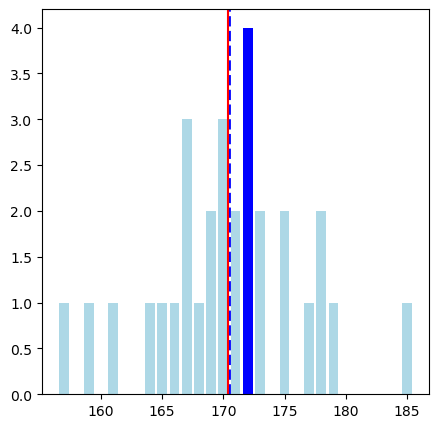

In [34]:
fig, ax = plt.subplots(figsize=(5, 5))

colors = ['blue' if v in modes else 'lightblue' for v in data[0]]
ax.bar(data[0], data[1], width=0.8, color = colors)
ax.axvline(x=me, color='blue', ls='--', lw=2)
ax.axvline(x=Mx, color='red');

***
## <font color = DarkGreen size = 5> <b>Меры изменчивости / показатели вариации</b> </font>

***
### <font color = MediumBlue size = 4> <b>Размах вариации (range)</b> </font>
— абсолюная разность между максимальным и минимальным значениями измеренного признака.

$R = X_{max} - X_{min}$

In [36]:
R = np.max(X) - np.min(X)
R

28

***
### <font color = MediumBlue size = 4> <b>Дисперсия (variance)</b> </font>
— средний квадрат отклонений индивидуальных значений признака от их средней величины.

Характеризует степень рассеянности значений случайной величины относительно ее математического ожидания.
<br><br>


<u>**Генеральная (смещенная) дисперсия**</u> $\sigma^2$ \
среднее арифметическое квадратов отклонений значений признака генеральной совокупности от их среднего значения $\bar{X}$.

Если все значения $x_1,x_2,\ldots,x_N$ признака генеральной совокупности объема $N$ различны: \
$\displaystyle \sigma^2 = \frac{\sum_{i=1}^{N}{(x_i-\bar{X})^2}}{N}$

Если значения признака $x_1,x_2,\ldots,x_k$ имеют соответственно частоты $N_1,N_2,\ldots,N_k$ причем
$\displaystyle \sum_{i=1}^{k}{N_k}=N$: \
$\displaystyle \sigma^2 = \frac{\sum_{i=1}^{k}{N_i(x_i-\bar{X})^2}}{N}$
<br><br>


<u>**Выборочная дисперсия**</u> $D$ \
среднее арифметическое квадратов отклонения наблюдаемых значений признака от среднего выборочного $\bar{x_e}$.

**Смещенная дисперсия** (для больших выборок) \

Если все значения $x_1,x_2,\ldots,x_n$ признака выборки объема $n$ различны: \
$\displaystyle D = \frac{\sum_{i=1}^{n}{(x_i-\bar{x_e})^2}}{n}$

Если значения признака $x_1,x_2,\ldots,x_k$ имеют соответственно частоты $n_1,n_2,\ldots,n_k$ причем
$\displaystyle \sum_{i=1}^{k}{n_k}=n$: \
$\displaystyle D = \frac{\sum_{i=1}^{k}{n_i(x_i-\bar{x_e})^2}}{n}$


**Несмещенная дисперсия** (для малых выборок $n<100$) \
В качестве оценки генеральной дисперсии принимают несмещенную дисперсию.

Если все значения $x_1,x_2,\ldots,x_n$ признака выборки объема $n$ различны: \
$\displaystyle S^2 = \frac{\sum_{i=1}^{n}{(x_i-\bar{x_e})^2}}{n-1}$

Если значения признака $x_1,x_2,\ldots,x_k$ имеют соответственно частоты $n_1,n_2,\ldots,n_k$ причем
$\displaystyle \sum_{i=1}^{k}{n_k}=n$: \
$\displaystyle S^2 = \frac{\sum_{i=1}^{k}{n_i(x_i-\bar{x_e})^2}}{n-1}$
<br><br>


#### <font color = SteelBlue size = 3> <b>Формула для вычисления дисперсии</b> </font>

Дисперсия равна среднему квадратов значений признака минус квадрат общей средней: \
$D = \bar{x^2} - (\bar{x})^2$, где 
$\displaystyle \bar{x} = \frac{\sum_{i=1}^{k}{n_i x_i}}{n}$, 
$\displaystyle \bar{x^2} = \frac{\sum_{i=1}^{k}{n_i x_i^2}}{n}$


In [7]:
# смещенная дисперсия
d = np.var(series)
print(f'D = {d:.2f}')

# несмещенная дисперсия
d = np.var(series, ddof=1)
print(f'D = {d:.2f}\n')

D = 34.84
D = 36.04



***
### <font color = MediumBlue size = 4> <b>Среднее квадратическое отклонение / стандартное отклонение (standard deviation)</b> </font>
— обобщающая статистическая характеристика вариации значений признака.

Показывает, насколько далеко наблюдения могут быть "разбросаны" относительно их среднего значения. \
Если эта мера мала, то кривая распределения имеет узкую, сжатую форму - результаты измерений обладают высокой степенью схожести. \
Если мера велика, то кривая рапределения имеет широкий, растянутый вид - велика степень различия оценок.
<br><br>


<u>**Генеральное среднее квадратическое (стандартое) отклонение**</u> \
— квадратный корень из генеральной дисперсии: \
$\displaystyle \sigma = \sqrt{\sigma^2}$
<br><br>


<u>**Выборочное среднее квадратическое (стандартое) отклонение**</u> \
— квадратный корень из выборочной дисперсии: \
$\displaystyle S = \sqrt{S^2}$


In [8]:
# смещенное стандартное отклонение
sig = np.std(series)
print(f'SD = {sig:.2f}')

# несмещенное стандартное отклонение
s = np.std(series, ddof=1)
print(f'SD = {s:.2f}')

SD = 5.90
SD = 6.00


***
### <font color = MediumBlue size = 4> <b>Свойства дисперсии и стандартного отклонения</b> </font>

1) Если каждый элемент выборки увеличить на $c$, таким образом сместив график распределения (гистограмму) вправу, то ни дисперсия, ни стандартное отклонение не изменяться.<br>
$D_{x+c} = D_x \\
S_{x+c} = S_x$

2) Если каждый элемент выборки увеличить в $c$ раз, таким образом увеличив график распределения *по ширине* (гистограмму в $c$ раз), то дисперсия увелиться в $c^2$ раз, а стандартное отклонение в $c$ раз.<br>
$D_{x\cdot c} = D_x\cdot c^2 \\
S_{x\cdot c} = S_x\cdot c$<br>

***
### <font color = MediumBlue size = 4> <b>Коэффициент вариации</b> </font>
– это отношение стандартного отклонения к средней, выраженное в процентах: \
$\displaystyle V = \frac{\sigma}{\bar{x}}\cdot100\%$

В статистике существует следующий эмпирический ориентир:
* если показатель вариации составляет примерно 30% и меньше, то статистическая совокупность считается **однородной**. Это означает, что большинство вариант находится недалеко от средней, и найденное значение $\bar{x}$ хорошо характеризует центральную тенденцию совокупности.
* если показатель вариации составляет существенно больше 30%, то совокупность **неоднородна**, то есть, значительное количество вариант находятся далеко от $\bar{x}$, и выборочная средняя плохо характеризует типичную варианту. В таких случаях целесообразно рассмотреть **квартили, децили,** а иногда и **перцентили**, которые делят вариационный ряд на части, и для каждого участка рассчитать свои показатели.


In [9]:
print(f'V = {sig/mn*100:.1f}')

V = 3.5


***
### <font color = MediumBlue size = 4> <b>Асимметрия</b> </font>
– мера отклонения эмпирического распределения частот от симметричного распределения относительно максимальной ординаты.

Асимметрия – это количественная мера скошенности симметричного распределения, т.е. некоторой плавности или крутости боковой части кривой распределения.

**Формула Пирсона**: $\displaystyle A_s = \frac{\bar{X}-M_0}{\sigma}$

>В левостороннем случае коэффициент асимметрии отрицателен $\bar{X}<M_0$, а в правостороннем – положителен $\bar{X}>M_0$, и чем больше $A_s$ по модулю – тем сильнее скос распределения.

***Недостаток формулы Пирсона состоит в том, что она описывает лишь центральную часть распределения и практически не учитывает «периферию».***
<br><br>

Для **выборочной совокупности** объёма $n$: \
$\displaystyle A_s = \frac{m_3}{\sigma^{3}_{e}}$, где \
$\sigma^{3}_{e}$ – куб стандартного выборочного отклонения \
$m_3$ – центральный эмпирический момент третьего порядка: $\displaystyle m_3 = \frac{\sum^{n}_{i=1}{(x_i-\bar x_e)^3}}{n}$

>Если $A_s>0$, то распределение скошено вправо, если $A_s<0$ – то влево.

При этом принята следующая условная градация:
* если $|A_s|<0.25$, то асимметрия незначительна
* если $0.25<|A_s|<0.5$, то асимметрия умеренная
* если $|A_s|>0.5$, то асимметрия существенная

Чем **меньше** $|A_s|$, тем рассматриваемое эмпирическое распределение **ближе** к нормальному распределению.

***
### <font color = MediumBlue size = 4> <b>Эксцесс</b> </font>
– это степень отклонения эмпирической кривой распределения от теоретической кривой нормального распределения это количественная мера «горбатости» симметричного распределения, т.е. некоторой выпуклости или пологости.

$\displaystyle E_k = \frac{m_4}{\sigma^{4}_{e}}$, где \
$m_4$ – центральный эмпирический момент четвертого порядка: $\displaystyle m_4 = \frac{\sum^{n}_{i=1}{(x_i-\bar x_e)^4}}{n}$


***
## <font color = DarkGreen size = 5> <b>Квантили распределения</b> </font>

Одним из наиболее действенных методов описания выборки является описание с помощью квантилей и процентилей.

**Квантиль $Q$** \
– это значение, отделяющее от распределения слева или справа определенную долю объема совокупности.

**Квартили $Q_1,Q_2,Q_3$** \
– это три точки (значения признака), которые делят упорядоченное множество данных на четыре части. \
Первый квартиль ($Q_1$),отделяет слева 25% объема совокупности. Второй квартиль ($Q_2$),делит совокупность на две равные по объему части (по 50%),он называется медианой. Третий квартиль ($Q_3$) отделяет слева 75% объема совокупности или справа 25% объема.

**Децили $D_1,D_2,\ldots,Q_9$** \
– это варианты, которые делят упорядоченный вариационный ряд на 10 равных (по количеству вариант) частей.

**Процентили $Р_1,P_2,\ldots,P_{99}$** \
– это точки (их 99) которыеделят упорядоченное множество данных на 100 частей.

Считается, что $n$-й процентиль - это такое значение, ниже которого расположено $n$ процентов наблюдений данной переменной. Следовательно, 40-й процентиль - это значение, ниже которого расположено 40% результатов наблюдений; 50-й процентиль называется медианой, а 25-й и 75-й процентили - нижним и верхним квантилям соответственно.

Квантили и процентили используются для определения частоты встречаемости тех или иных значений (или интервалов) измеренного признака или для выделения подгрупп и отдельных испытуемых, наиболее типичных или нетипичных для данного множества наблюдений. Через квартили так же могут определяться числовые характеристики положения, рассеяния и асимметрии.

После разбиения вариационного ряда каждый участок исследуется по отдельности – рассчитываются локальные средние показатели, локальные показатели вариации и т.д.


In [10]:
print('Первый квартиль или 0.25 квантиль распределения:',np.quantile(series, 0.25))
print('Второй квартиль или 0.5 квантиль или медиана распределения:',np.quantile(series, 0.50))
print('Третий квартиль или 0.75 квантиль распределения:',np.quantile(series, 0.75))
print('Четвертый квартиль или 1 квантиль распределения:',np.quantile(series, 1))

Первый квартиль или 0.25 квантиль распределения: 167.0
Второй квартиль или 0.5 квантиль или медиана распределения: 170.5
Третий квартиль или 0.75 квантиль распределения: 173.0
Четвертый квартиль или 1 квантиль распределения: 185


***
### <font color = MediumBlue size = 4> <b>Ящик с усами (boxplot)</b> </font>
– график, использующийся в описательной статистике.

По нему можно узнать медиану распределения (жирная линия в центре). \
1 квартиль распределения (квантиль уровня 0.25), 3 квартиль распределения (квантиль уровня 0.75), интер-квартильный размах. \
Еще можно судить об ассиметрии выборки по смещению медианы относительно центра интер-квартильного размаха. \
Усы графика означают "нормальное" расстояние или еще это расстояние называют данными без выбросов. В диапазоне "нормального" расстояния лежит 99,3% всех измерений, остальные 0,7% принято считать выбросами. То есть это те значения которые очень сильно отклоняются вверх или вниз. Точками на таком графике отображаются выбросы.

<u>**Интер-квартильный размах**</u> (IQR) \
– "расстояние" или разница между 3 и 1 квартилем. По этому показателю можно судить насколько сильно разбросана выборка. В пределах интер-квартильного размаха лежит 50% всех наблюдений.![](https://upload.wikimedia.org/wikipedia/commons/1/1a/Boxplot_vs_PDF.svg)

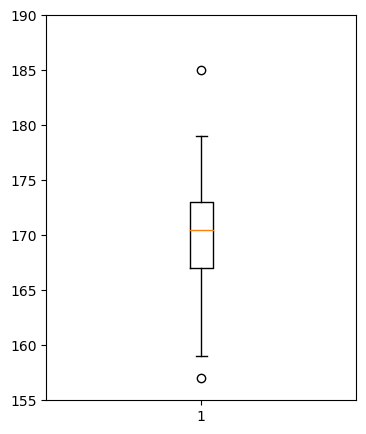

In [39]:
fig, ax = plt.subplots(figsize=(4, 5))

plt.axis([0,2,155,190])
plt.boxplot(X, showfliers=True);

***
## <font color = DarkGreen size = 5> <b>Оценка вероятности (биномиального распределения) по относительной частоте</b> </font>

Пусть производятся независимые испытания с неизвестной вероятностью $p$ появления события $A$ в каждом испытании.

В качестве точечной оценки неизвестной вероятности $p$ принимают относительную частоту \
$\displaystyle W = \frac{m}{n}$, где \
$m$ – число появления события $A$, \
$n$ – число испытаний.

Эта оценка несмещенная, т.е. ее **математическое ожидание** равно оцениваемой вероятности. \
Учитывая, что $M(m)=np$: $\displaystyle M(W) = M\left(\frac{m}{n}\right) = \frac{M(m)}{n} = \frac{np}{n} = p$

Найдем **дисперсию** оценки, приняв во внимание, что $D(m)=npq$: $\displaystyle D(W) = D\left(\frac{m}{n}\right) = \frac{D(m)}{n^2} = \frac{npq}{n^2} = \frac{pq}{n}$

Отсюда **среднее квадратическое** отклонение: $\displaystyle \sigma_W = \sqrt{D(W)} = \sqrt{\frac{pq}{n}}$